In [1]:
import numpy as np # for mathematical caluclations 
import pandas as pd
from datetime import datetime # to access datetime

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for interactive plotting 
import plotly.graph_objects as go # for interactive plotting

# clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import cluster
from mpl_toolkits.mplot3d import axes3d

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stati
plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (15,5)

# warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Explorative Data Analysis

In [2]:
spotify = pd.read_csv('spotify.csv',index_col = 'Unnamed: 0')
spotify.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [3]:
spotify.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
null_values = spotify[spotify['artists'].isnull()]
null_values

track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop

The null value is off track_id, artists, album_name and track_name, which do not affect the usage of song attribute columns. Therefore we do not drop this row

## Cleaning

In [6]:
#only include songs where speechiness below 0.66 (remove speeches, podcasts etc)
spotify = spotify[spotify['speechiness'] <= 0.66]
spotify.shape

(113120, 20)

In [7]:
# change explicit to boolean
spotify['explicit'] = spotify['explicit'].astype(int)

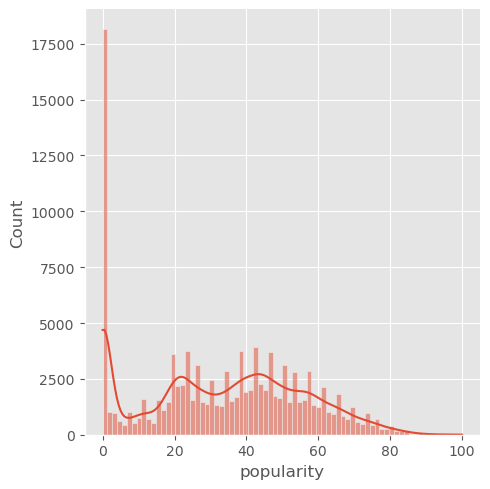

In [8]:
sns.displot(spotify.popularity, kde = True)

## Understanding popularity by genre

In [9]:
#sorting by mean popularity
spotify.groupby(['track_genre'])['popularity'].aggregate(['mean','median'])\
    .sort_values(by = 'mean',ascending = False).head(5)

mean  median
track_genre                   
pop-film     59.283000    60.0
k-pop        56.886774    60.0
chill        53.673695    57.0
sad          52.368104    54.0
grunge       49.594000    55.0

In [10]:
#sorting by median popularity
spotify.groupby(['track_genre'])['popularity'].aggregate(['mean','median'])\
    .sort_values(by = 'median',ascending = False).head(5)

mean  median
track_genre                   
pop          47.576000    66.0
pop-film     59.283000    60.0
k-pop        56.886774    60.0
hip-hop      37.759000    58.0
chill        53.673695    57.0

<Axes: xlabel='track_genre', ylabel='popularity'>

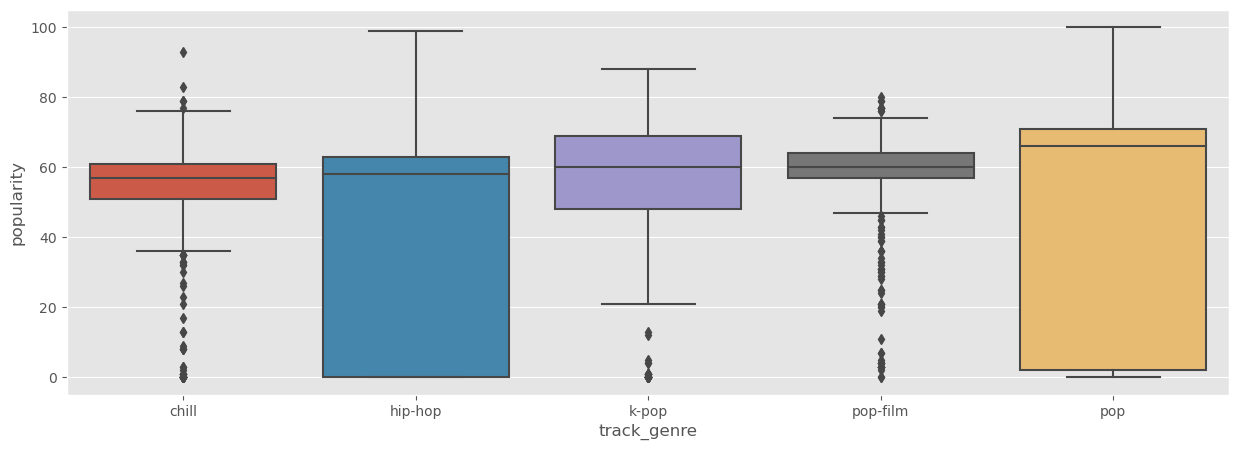

In [11]:
#box-plot for top genres
desired_genre = ['pop-film','k-pop','chill','pop','hip-hop'] 
top_genre = spotify[spotify['track_genre'].isin(desired_genre)]
sns.boxplot(data = top_genre, x = 'track_genre', y = 'popularity')

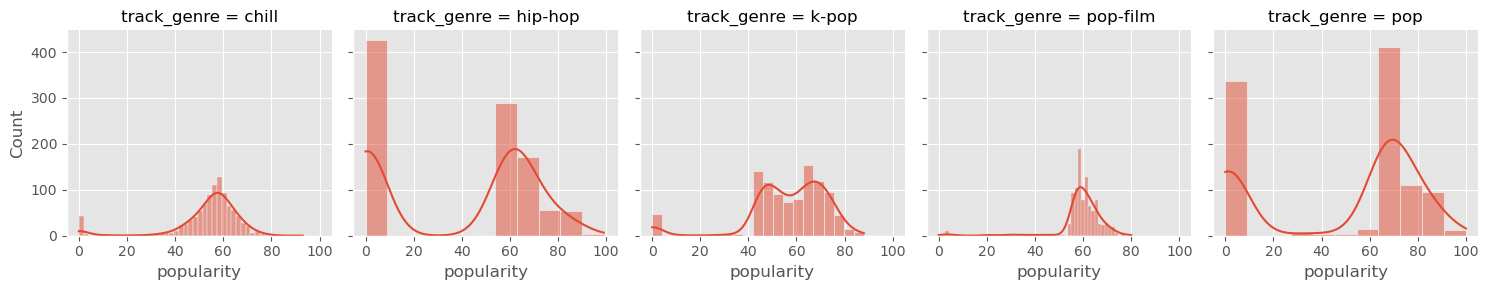

In [12]:
#facet grid
g = sns.FacetGrid(top_genre,col='track_genre')
g.map(sns.histplot, 'popularity',kde=True)

- Chill, k-pop and pop-film genres are pretty normally distributed -> safe choice to invest in. 
- Hip-hop and pop have higher risks -> higher return -> either like it or not like it

<Axes: >

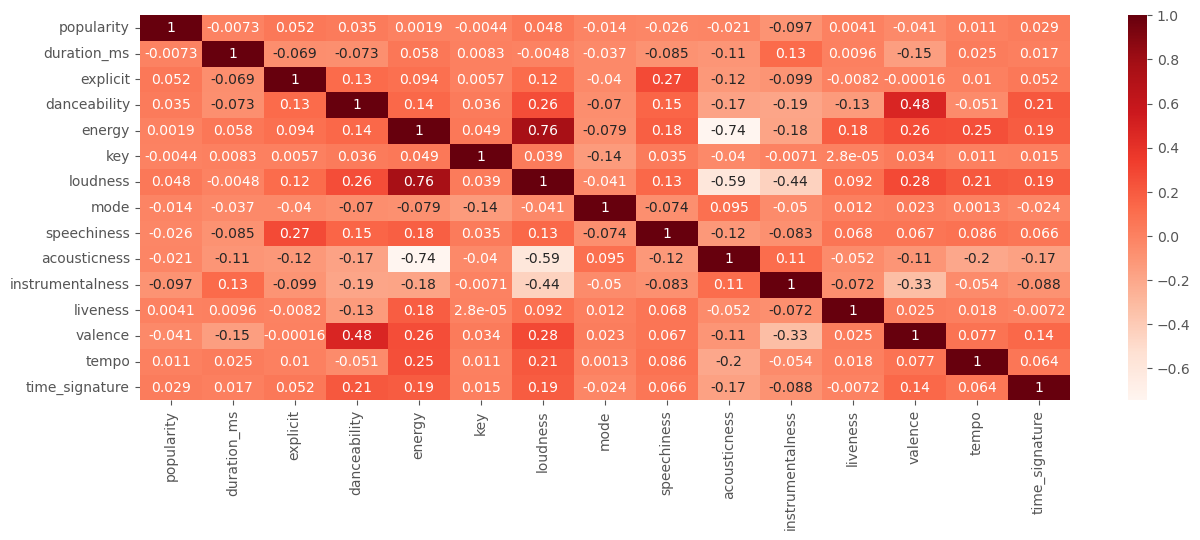

In [13]:
#heatmap
cor_matrix = spotify.corr(numeric_only=True) 
sns.heatmap(cor_matrix, annot = True, cmap = 'Reds')

## Data split to genre

In [14]:
top_genre

track_id                                    artists  \
15000  47isJpIIO8m7BJEhiFhnaf                                      dhruv   
15001  5e2l2ZAMwHmrkdM4Z6NhAR                     Shiloh Dynasty;Timmies   
15002  3XV5r1cMB2AlD2ir0v6mfm                              yaeow;Neptune   
15003  5HsSsEeP3hU9QSfHZrzbtA                               Finding Hope   
15004  22I3h5AOENlH4CqXJsEbFR                          Justine Skye;Tyga   
...                       ...                                        ...   
81995  6mmGbsCqf5e8vxv1WodYIG                              G. V. Prakash   
81996  2WO5nzB7QtKn9ZRc9Jkalt            Harris Jayaraj;Sudha Ragunathan   
81997  5OCFWPgrCCNBukB3YrDD90                                 Raj Barman   
81998  13wIQbwSuQ4YFvDvtQgSVc  Harris Jayaraj;Unnikrishnan;Chinmayi;Mega   
81999  62yaHPUl2vELHwaHb6R5oW                         Yuvan Shankar Raja   

                                              album_name  \
15000                                        double take   
15001                                     Vivid Pictures   
15002                                 The Way I Love You   
15003                                           Our Love   
15004                               Collide (feat. Tyga)   
...                                                  ...   
81995     Aadukalam (Original Motion Picture Soundtrack)   
81996  Vaaranam Aayiram (Original Motion Picture Soun...   
81997                     Tu Mile Dil Khile - Raj Barman   
81998      Aadhavan (Original Motion Picture Soundtrack)   
81999                                        Pudhupettai   

                 track_name  popularity  duration_ms  explicit  danceability  \
15000           double take          75       171743         0         0.456   
15001                 Again          74       157205         0         0.603   
15002    The Way I Love You          60       162726         0         0.543   
15003               3:00 AM          68       201951         0         0.550   
15004  Collide (feat. Tyga)          75       260169         1         0.418   
...                     ...         ...          ...       ...           ...   
81995           Yathe Yathe          64       344360         0         0.448   
81996          Annul Maelae          64       322506         0         0.773   
81997     Tu Mile Dil Khile          62       197716         0         0.639   
81998       Vaarayo Vaarayo          64       316680         0         0.718   
81999            Oru Naalil          63       384256         0         0.712   

       energy  key  loudness  mode  speechiness  acousticness  \
15000   0.437    8   -11.156     1       0.0867         0.839   
15001   0.204    7   -12.727     0       0.1120         0.479   
15002   0.206    6   -18.037     1       0.0319         0.940   
15003   0.147    0   -18.675     0       0.0404         0.563   
15004   0.310   11    -9.869     0       0.0625         0.095   
...       ...  ...       ...   ...          ...           ...   
81995   0.607    9    -4.606     0       0.0611         0.791   
81996   0.436    4   -10.972     0       0.0321         0.672   
81997   0.368    2   -14.096     0       0.0480         0.245   
81998   0.361    5    -9.740     0       0.0298         0.565   
81999   0.422    6   -10.688     1       0.0460         0.307   

       instrumentalness  liveness  valence    tempo  time_signature  \
15000          0.000000    0.2180   0.2090  108.678               4   
15001          0.071400    0.6420   0.7100   74.688               5   
15002          0.453000    0.3850   0.1300  113.107               3   
15003          0.001020    0.2860   0.0346   81.991               4   
15004          0.000000    0.2160   0.1310  139.614               4   
...                 ...       ...      ...      ...             ...   
81995          0.000000    0.0888   0.4840  139.509               4   
81996          0.006780    0.1970   0.5330  115.917               4   
81997 

In [15]:
needed_col_with_genre = ['track_genre', 'popularity', 'explicit', 'danceability', 'tempo', 'instrumentalness', 'loudness', 'valence']
needed_col_without_genre = ['popularity', 'explicit', 'danceability', 'tempo', 'instrumentalness', 'loudness', 'valence']
top_genre1 = top_genre[needed_col_with_genre] # whole dataset
top_genre2 = top_genre[needed_col_without_genre] # genre clustering

In [16]:
pop = top_genre1[top_genre1['track_genre'] == 'pop']
pop_film = top_genre1[top_genre1['track_genre'] == 'pop-film']
kpop = top_genre1[top_genre1['track_genre'] == 'k-pop']
hiphop = top_genre1[top_genre1['track_genre'] == 'hip-hop']
chill = top_genre1[top_genre1['track_genre'] == 'chill']

### Pop

In [17]:
pop = pop.drop(columns=['track_genre'])
pop.head()

popularity  explicit  danceability    tempo  instrumentalness  \
81000          91         0         0.514  171.005          0.000095   
81001          74         0         0.535  191.827          0.000000   
81002          83         0         0.860  114.984          0.163000   
81003          96         1         0.733  116.992          0.000001   
81004          90         1         0.679  186.003          0.000006   

       loudness  valence  
81000    -5.934    0.334  
81001    -7.862    0.373  
81002    -6.510    0.952  
81003    -5.529    0.310  
81004    -7.015    0.486

<Axes: >

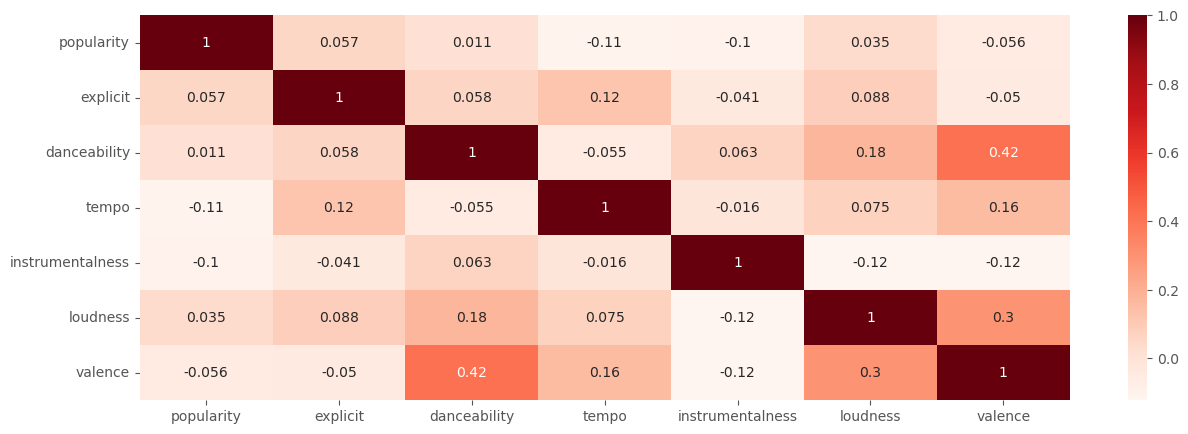

In [18]:
#heatmap
cor_matrix_pop = pop.corr(numeric_only=True) 
sns.heatmap(cor_matrix_pop, annot = True, cmap = 'Reds')

<Axes: xlabel='danceability', ylabel='popularity'>

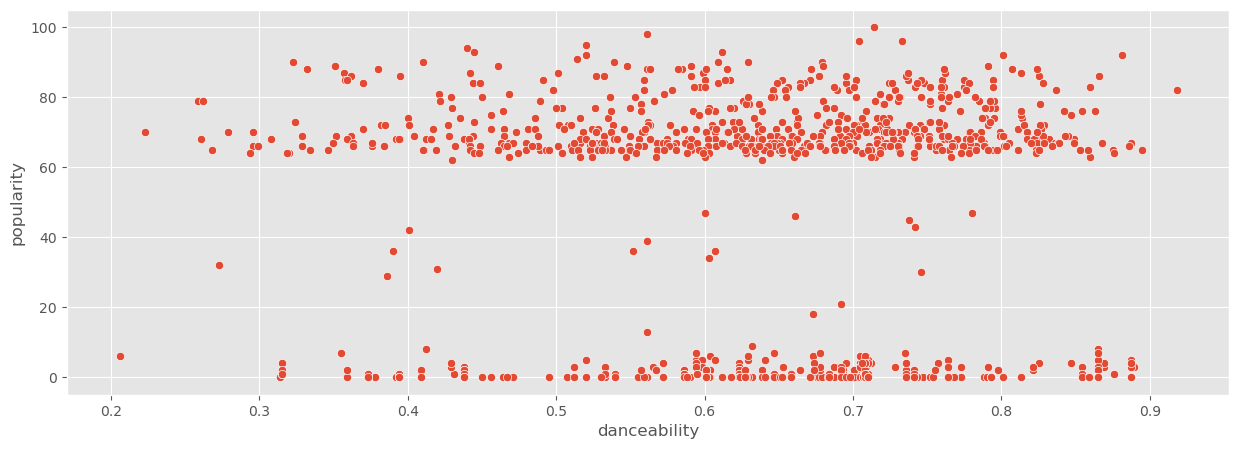

In [19]:
sns.scatterplot(data = pop, 
                    x = 'danceability', 
                    y = 'popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

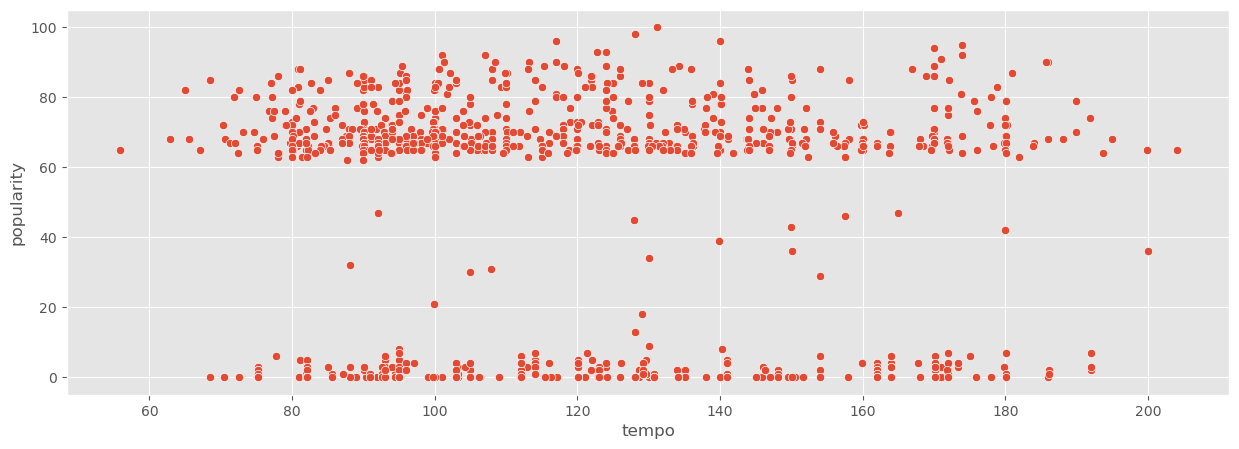

In [20]:
sns.scatterplot(data = pop, 
                    x = 'tempo', 
                    y = 'popularity')

### Pop-film

In [21]:
pop_film = pop_film.drop(columns=['track_genre'])
pop_film.head()

popularity  explicit  danceability    tempo  instrumentalness  \
80000          74         0         0.535  191.827          0.000000   
80001          71         0         0.481   91.796          0.000000   
80002          73         0         0.662   79.972          0.000017   
80003          71         0         0.528   94.058          0.000000   
80004          71         0         0.827  119.936          0.000000   

       loudness  valence  
80000    -7.862    0.373  
80001    -8.200    0.257  
80002   -11.200    0.617  
80003    -6.250    0.317  
80004    -5.531    0.774

<Axes: >

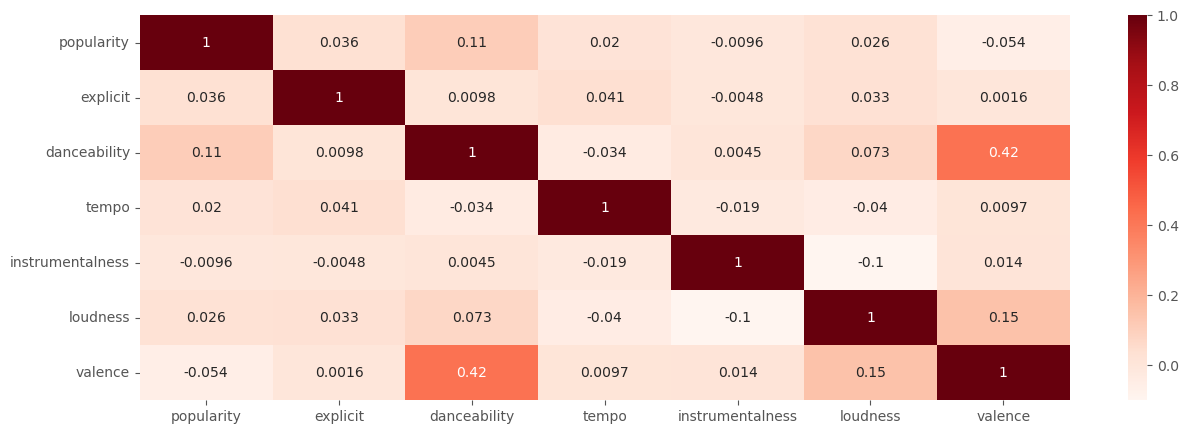

In [22]:
#heatmap
cor_matrix_pop_film = pop_film.corr(numeric_only=True) 
sns.heatmap(cor_matrix_pop_film, annot = True, cmap = 'Reds')

<Axes: xlabel='danceability', ylabel='popularity'>

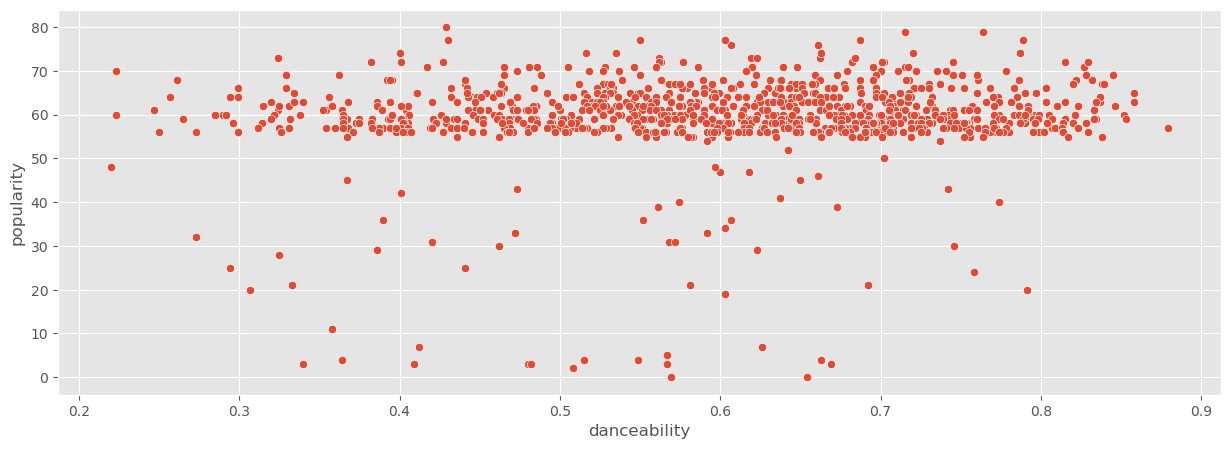

In [23]:
sns.scatterplot(data = pop_film, 
                    x = 'danceability', 
                    y = 'popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

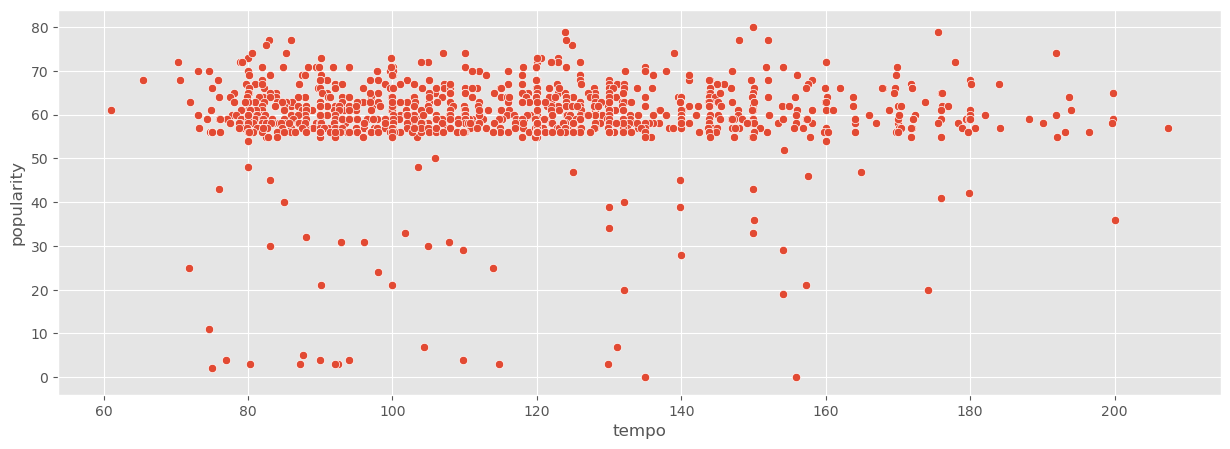

In [24]:
sns.scatterplot(data = pop_film, 
                    x = 'tempo', 
                    y = 'popularity')

### Kpop

In [25]:
kpop = kpop.drop(columns=['track_genre'])
kpop.head()

popularity  explicit  danceability    tempo  instrumentalness  \
65000          73         0         0.562  122.925          0.000268   
65001          78         0         0.826  140.037          0.000041   
65002          83         0         0.738   95.035          0.000000   
65003          73         0         0.752   95.043          0.000000   
65004          80         0         0.645  119.947          0.000000   

       loudness  valence  
65000    -8.744    0.415  
65001   -10.121    0.400  
65002    -5.235    0.740  
65003    -5.165    0.388  
65004    -4.761    0.803

<Axes: >

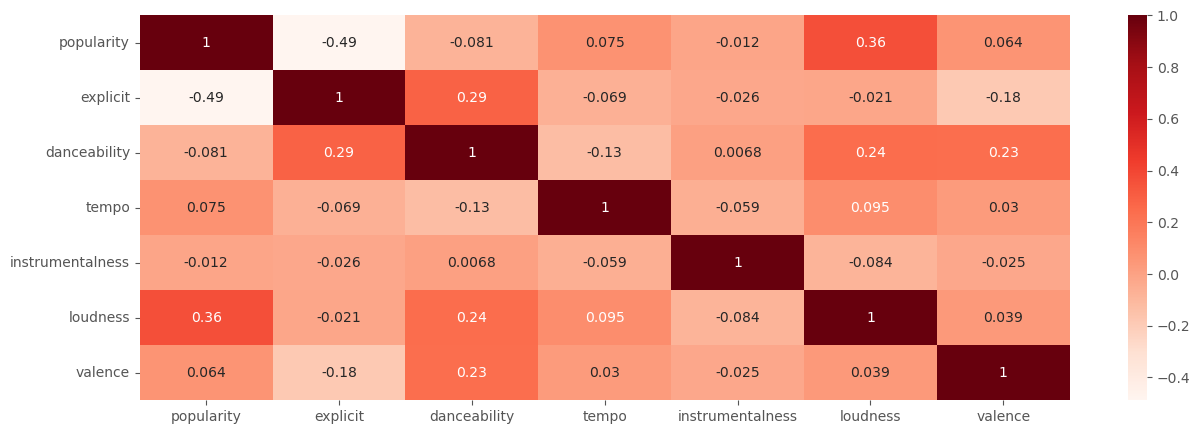

In [26]:
#heatmap
cor_matrix_kpop = kpop.corr(numeric_only=True) 
sns.heatmap(cor_matrix_kpop, annot = True, cmap = 'Reds')

<Axes: xlabel='danceability', ylabel='popularity'>

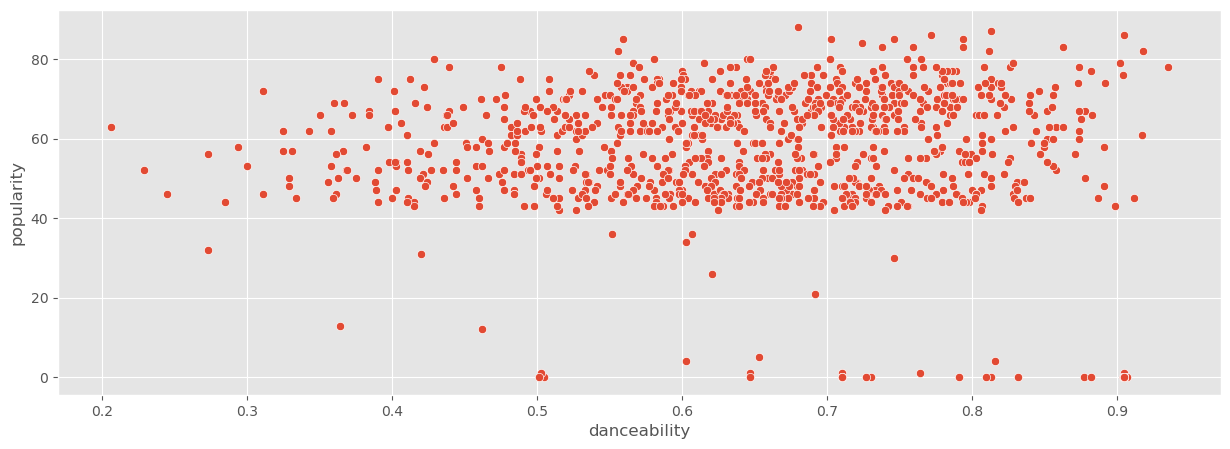

In [27]:
sns.scatterplot(data = kpop, 
                    x = 'danceability', 
                    y = 'popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

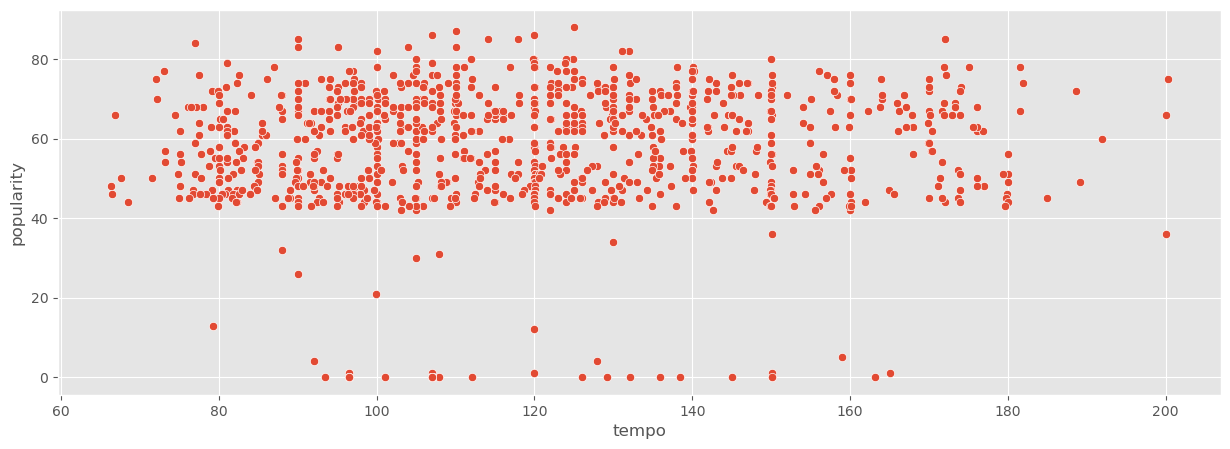

In [28]:
sns.scatterplot(data = kpop, 
                    x = 'tempo', 
                    y = 'popularity')

### Hiphop

In [29]:
hiphop = hiphop.drop(columns=['track_genre'])
hiphop.head()

popularity  explicit  danceability    tempo  instrumentalness  \
51000          83         0         0.860  114.984          0.163000   
51001          83         0         0.768  137.034          0.000000   
51002          82         0         0.711  180.219          0.016300   
51003          77         0         0.796   98.967          0.000025   
51004          89         1         0.591  169.928          0.000000   

       loudness  valence  
51000    -6.510    0.952  
51001    -8.936    0.722  
51002   -10.048    0.674  
51003    -7.030    0.304  
51004    -5.484    0.478

<Axes: >

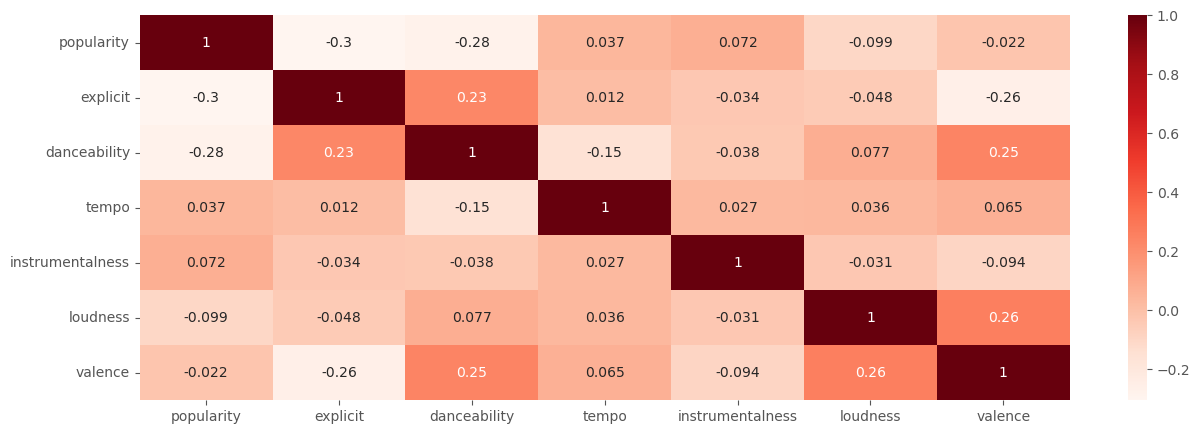

In [30]:
#heatmap
cor_matrix_hiphop = hiphop.corr(numeric_only=True) 
sns.heatmap(cor_matrix_hiphop, annot = True, cmap = 'Reds')

<Axes: xlabel='danceability', ylabel='popularity'>

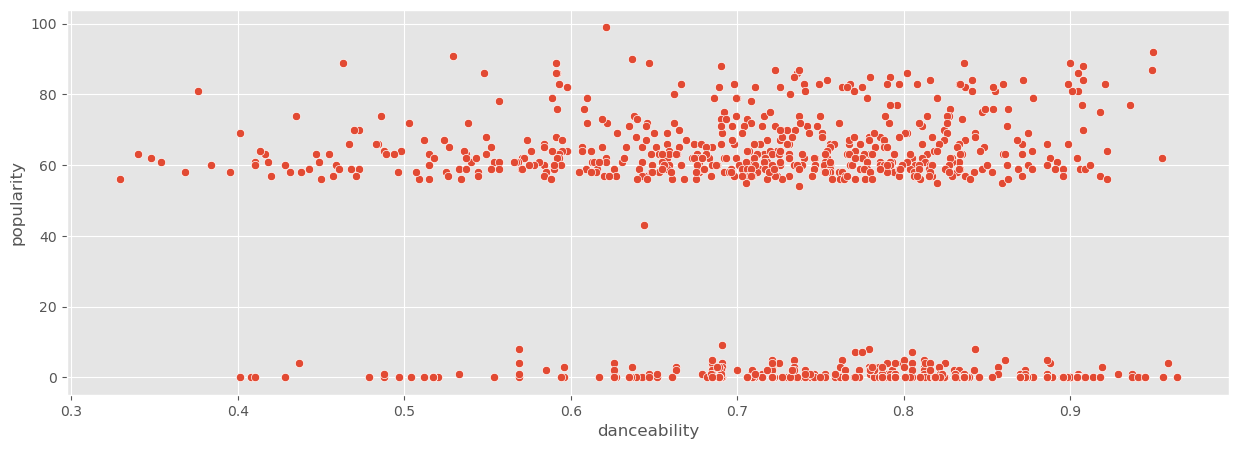

In [31]:
sns.scatterplot(data = hiphop, 
                    x = 'danceability', 
                    y = 'popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

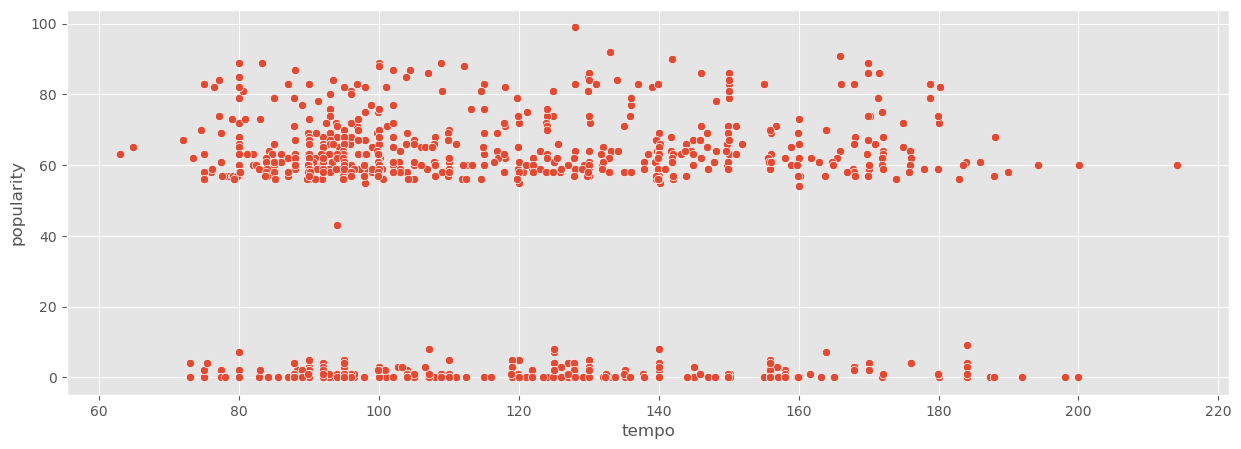

In [32]:
sns.scatterplot(data = hiphop, 
                    x = 'tempo', 
                    y = 'popularity')

### Chill

In [33]:
chill = chill.drop(columns=['track_genre'])
chill.head()

popularity  explicit  danceability    tempo  instrumentalness  \
15000          75         0         0.456  108.678           0.00000   
15001          74         0         0.603   74.688           0.07140   
15002          60         0         0.543  113.107           0.45300   
15003          68         0         0.550   81.991           0.00102   
15004          75         1         0.418  139.614           0.00000   

       loudness  valence  
15000   -11.156   0.2090  
15001   -12.727   0.7100  
15002   -18.037   0.1300  
15003   -18.675   0.0346  
15004    -9.869   0.1310

<Axes: >

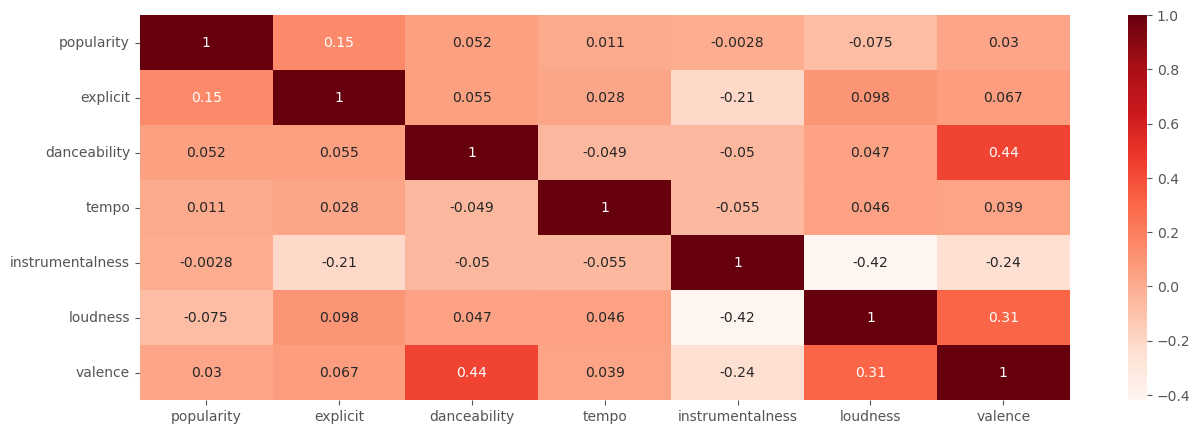

In [34]:
#heatmap
cor_matrix_chill = chill.corr(numeric_only=True) 
sns.heatmap(cor_matrix_chill, annot = True, cmap = 'Reds')

<Axes: xlabel='danceability', ylabel='popularity'>

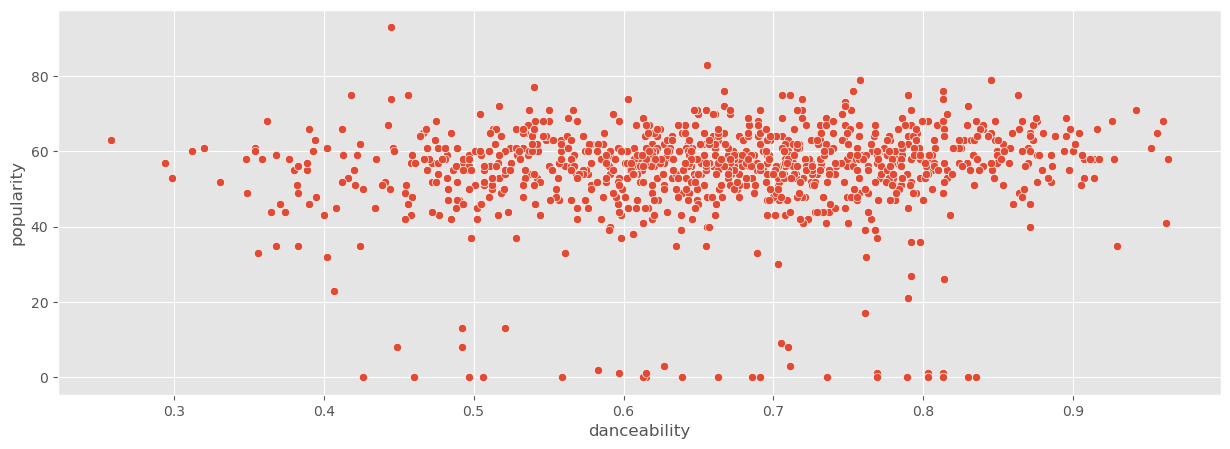

In [35]:
sns.scatterplot(data = chill, 
                    x = 'danceability', 
                    y = 'popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

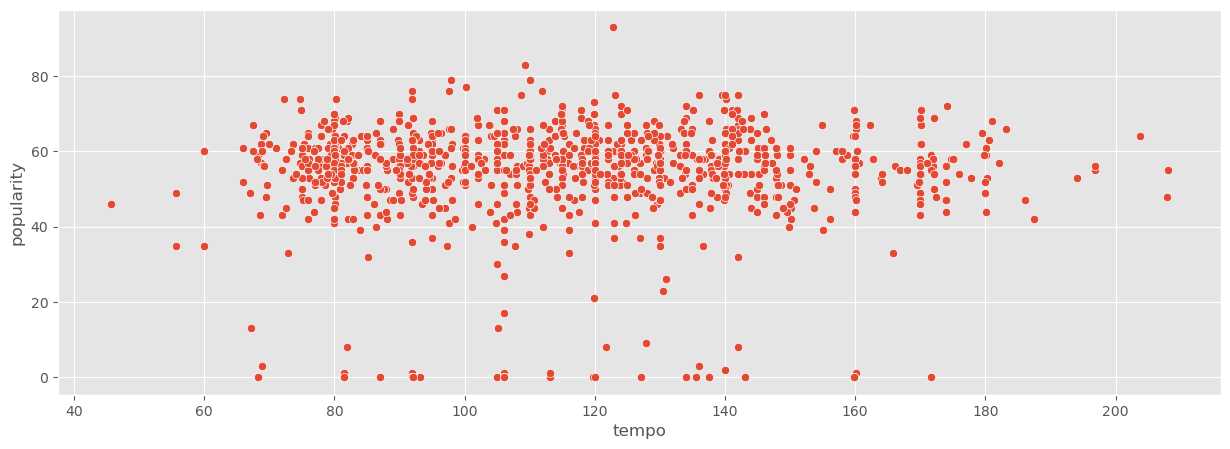

In [36]:
sns.scatterplot(data = chill, 
                    x = 'tempo', 
                    y = 'popularity')

# Linear Regression - Failed

In [37]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

x = kpop.drop(columns = ['popularity'])
y = kpop['popularity']
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     94.28
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.09e-93
Time:                        17:04:05   Log-Likelihood:                -4015.5
No. Observations:                 998   AIC:                             8045.
Df Residuals:                     991   BIC:                             8079.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               74.8571      3.568  

# K-Means Clustering

In [38]:
#cluster summary
def cluster_table(data, cluster):
    # Grouping by cluster
    grouped = data.groupby(cluster)

    # Adding a count of data points in each cluster
    summary_table = grouped.size().to_frame(name='Count')

    # Adding summary statistics
    summary_stats = grouped.agg({col: 'median' if np.issubdtype(data[col].dtype, np.number)
                                 else lambda x: (x == '1').sum() / len(x)
                                 for col in data.columns if col != cluster})

    # Merging the count with summary statistics
    summary_table = summary_table.join(summary_stats)

    # Formatting numeric columns
    for col in summary_table.select_dtypes(include=[np.number]).columns:
        summary_table[col] = summary_table[col].apply(lambda x: round(x, 2) if isinstance(x, float) else x)

    return summary_table

## Whole dataset

In [39]:
top_genre1

track_genre  popularity  explicit  danceability    tempo  \
15000       chill          75         0         0.456  108.678   
15001       chill          74         0         0.603   74.688   
15002       chill          60         0         0.543  113.107   
15003       chill          68         0         0.550   81.991   
15004       chill          75         1         0.418  139.614   
...           ...         ...       ...           ...      ...   
81995         pop          64         0         0.448  139.509   
81996         pop          64         0         0.773  115.917   
81997         pop          62         0         0.639   89.940   
81998         pop          64         0         0.718  103.000   
81999         pop          63         0         0.712   80.014   

       instrumentalness  loudness  valence  
15000          0.000000   -11.156   0.2090  
15001          0.071400   -12.727   0.7100  
15002          0.453000   -18.037   0.1300  
15003          0.001020   -18.675   0.0346  
15004          0.000000    -9.869   0.1310  
...                 ...       ...      ...  
81995          0.000000    -4.606   0.4840  
81996          0.006780   -10.972   0.5330  
81997          0.000000   -14.096   0.4150  
81998          0.119000    -9.740   0.4460  
81999          0.000017   -10.688   0.7720  

[4994 rows x 8 columns]

In [40]:
model_0 = top_genre1
model_0 = pd.get_dummies(top_genre1, columns=['track_genre'])
model_0

popularity  explicit  danceability    tempo  instrumentalness  \
15000          75         0         0.456  108.678          0.000000   
15001          74         0         0.603   74.688          0.071400   
15002          60         0         0.543  113.107          0.453000   
15003          68         0         0.550   81.991          0.001020   
15004          75         1         0.418  139.614          0.000000   
...           ...       ...           ...      ...               ...   
81995          64         0         0.448  139.509          0.000000   
81996          64         0         0.773  115.917          0.006780   
81997          62         0         0.639   89.940          0.000000   
81998          64         0         0.718  103.000          0.119000   
81999          63         0         0.712   80.014          0.000017   

       loudness  valence  track_genre_chill  track_genre_hip-hop  \
15000   -11.156   0.2090                  1                    0   
15001   -12.727   0.7100                  1                    0   
15002   -18.037   0.1300                  1                    0   
15003   -18.675   0.0346                  1                    0   
15004    -9.869   0.1310                  1                    0   
...         ...      ...                ...                  ...   
81995    -4.606   0.4840                  0                    0   
81996   -10.972   0.5330                  0                    0   
81997   -14.096   0.4150                  0                    0   
81998    -9.740   0.4460                  0                    0   
81999   -10.688   0.7720                  0                    0   

       track_genre_k-pop  track_genre_pop  track_genre_pop-film  
15000                  0                0                     0  
15001                  0                0                     0  
15002                  0                0                     0  
15003                  0                0                     0  
15004                  0                0                     0  
...                  ...              ...                   ...  
81995                  0                1                     0  
81996                  0                1                     0  
81997                  0                1                     0  
81998                  0                1                     0  
81999                  0                1                     0  

[4994 rows x 12 columns]

In [41]:
X = model_0
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)

X_scaled

popularity  explicit  danceability     tempo  instrumentalness  \
15000    0.958143 -0.373714     -1.429441 -0.318475         -0.253963   
15001    0.918169 -0.373714     -0.374350 -1.487799          0.167033   
15002    0.358523 -0.373714     -0.804999 -0.166109          2.417061   
15003    0.678321 -0.373714     -0.754757 -1.236561         -0.247949   
15004    0.958143  2.675842     -1.702185  0.745785         -0.253963   
...           ...       ...           ...       ...               ...   
81995    0.518422 -0.373714     -1.486861  0.742172         -0.253963   
81996    0.518422 -0.373714      0.845822 -0.069439         -0.213986   
81997    0.438473 -0.373714     -0.115961 -0.963100         -0.253963   
81998    0.518422 -0.373714      0.451061 -0.513810          0.447696   
81999    0.478447 -0.373714      0.407996 -1.304574         -0.253862   

       loudness   valence  track_genre_chill  track_genre_hip-hop  \
15000 -1.073570 -1.361175           2.003511            -0.500375   
15001 -1.540361  0.908569           2.003511            -0.500375   
15002 -3.118122 -1.719078           2.003511            -0.500375   
15003 -3.307691 -2.151281           2.003511            -0.500375   
15004 -0.691163 -1.714548           2.003511            -0.500375   
...         ...       ...                ...                  ...   
81995  0.872633 -0.115308          -0.499124            -0.500375   
81996 -1.018898  0.106683          -0.499124            -0.500375   
81997 -1.947132 -0.427907          -0.499124            -0.500375   
81998 -0.652834 -0.287464          -0.499124            -0.500375   
81999 -0.934513  1.189455          -0.499124            -0.500375   

       track_genre_k-pop  track_genre_pop  track_genre_pop-film  
15000           -0.49975        -0.500375             -0.500375  
15001           -0.49975        -0.500375             -0.500375  
15002           -0.49975        -0.500375             -0.500375  
15003           -0.49975        -0.500375             -0.500375  
15004           -0.49975        -0.500375             -0.500375  
...                  ...              ...                   ...  
81995           -0.49975         1.998499             -0.500375  
81996           -0.49975         1.998499             -0.500375  
81997           -0.49975         1.998499             -0.500375  
81998           -0.49975         1.998499             -0.500375  
81999           -0.49975         1.998499             -0.500375  

[4994 rows x 12 columns]

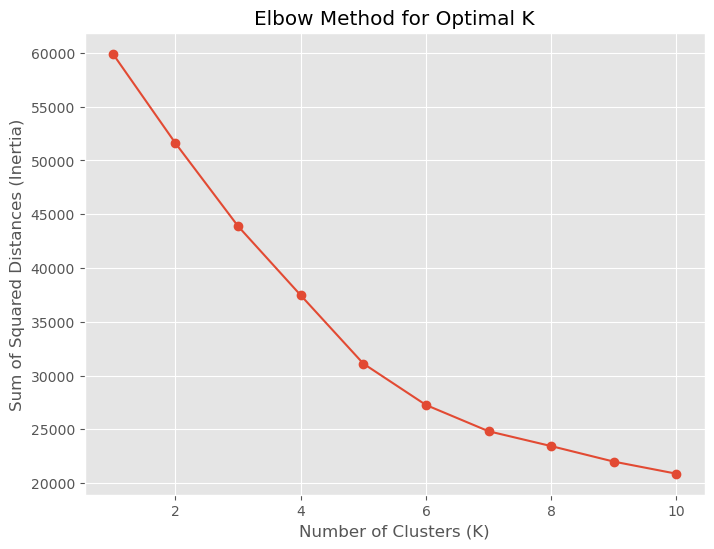

In [42]:
# Run k-means clustering for a range of k values
inertia = []
for k in range(1, 11):  # You can adjust the range based on your specific needs
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()

In [43]:
#choose k = 5
model = cluster.KMeans(n_clusters = 5, random_state = 10, n_init=10)

#fit the created k-means model to our data
model.fit(X_scaled)

X_scaled['cluster'] = model.labels_
X_scaled

popularity  explicit  danceability     tempo  instrumentalness  \
15000    0.958143 -0.373714     -1.429441 -0.318475         -0.253963   
15001    0.918169 -0.373714     -0.374350 -1.487799          0.167033   
15002    0.358523 -0.373714     -0.804999 -0.166109          2.417061   
15003    0.678321 -0.373714     -0.754757 -1.236561         -0.247949   
15004    0.958143  2.675842     -1.702185  0.745785         -0.253963   
...           ...       ...           ...       ...               ...   
81995    0.518422 -0.373714     -1.486861  0.742172         -0.253963   
81996    0.518422 -0.373714      0.845822 -0.069439         -0.213986   
81997    0.438473 -0.373714     -0.115961 -0.963100         -0.253963   
81998    0.518422 -0.373714      0.451061 -0.513810          0.447696   
81999    0.478447 -0.373714      0.407996 -1.304574         -0.253862   

       loudness   valence  track_genre_chill  track_genre_hip-hop  \
15000 -1.073570 -1.361175           2.003511            -0.500375   
15001 -1.540361  0.908569           2.003511            -0.500375   
15002 -3.118122 -1.719078           2.003511            -0.500375   
15003 -3.307691 -2.151281           2.003511            -0.500375   
15004 -0.691163 -1.714548           2.003511            -0.500375   
...         ...       ...                ...                  ...   
81995  0.872633 -0.115308          -0.499124            -0.500375   
81996 -1.018898  0.106683          -0.499124            -0.500375   
81997 -1.947132 -0.427907          -0.499124            -0.500375   
81998 -0.652834 -0.287464          -0.499124            -0.500375   
81999 -0.934513  1.189455          -0.499124            -0.500375   

       track_genre_k-pop  track_genre_pop  track_genre_pop-film  cluster  
15000           -0.49975        -0.500375             -0.500375        3  
15001           -0.49975        -0.500375             -0.500375        3  
15002           -0.49975        -0.500375             -0.500375        3  
15003           -0.49975        -0.500375             -0.500375        3  
15004           -0.49975        -0.500375             -0.500375        3  
...                  ...              ...                   ...      ...  
81995           -0.49975         1.998499             -0.500375        2  
81996           -0.49975         1.998499             -0.500375        2  
81997           -0.49975         1.998499             -0.500375        2  
81998           -0.49975         1.998499             -0.500375        2  
81999           -0.49975         1.998499             -0.500375        2  

[4994 rows x 13 columns]

In [44]:
# Generating the cluster summary
cluster_summary = cluster_table(X_scaled, 'cluster')

# Printing the summary table
print(cluster_summary)

         Count  popularity  explicit  danceability  tempo  instrumentalness  \
cluster                                                                       
0         1000        0.36     -0.37         -0.35  -0.10             -0.25   
1          997        0.36     -0.37          0.01  -0.04             -0.25   
2         1000        0.60     -0.37         -0.09   0.02             -0.25   
3          998        0.24     -0.37          0.13  -0.11             -0.25   
4          999        0.28     -0.37          0.70  -0.37             -0.25   

         loudness  valence  track_genre_chill  track_genre_hip-hop  \
cluster                                                              
0           -0.01     0.12               -0.5                 -0.5   
1            0.42     0.27               -0.5                 -0.5   
2            0.24    -0.05               -0.5                 -0.5   
3           -0.67    -0.63                2.0                 -0.5   
4            0.49     0.18

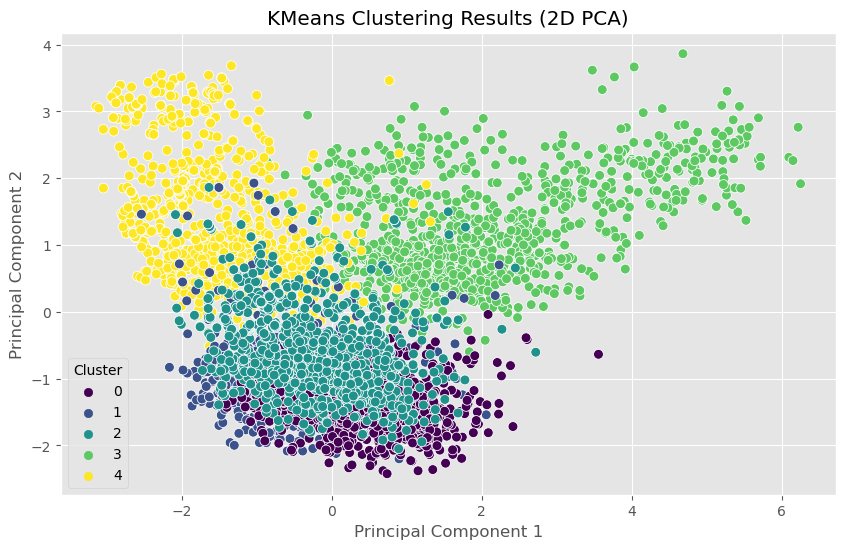

In [45]:
#pca = 2
pca = PCA(n_components = 2) # 2D graph for easy interpretation
X_pca = pca.fit_transform(X_scaled.drop('cluster', axis=1))

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_scaled['cluster'], palette='viridis', s=50)
plt.title('KMeans Clustering Results (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [46]:
# PCA = 3
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled.drop('cluster', axis=1))
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = X_scaled['cluster'].reset_index(drop=True)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='cluster',
    #symbol='cluster',
    opacity=0.7,
    title='3D Scatter Plot with PCA'
)

# Show the plot
fig.show()

## Pop

In [47]:
Y = pop
scaler = StandardScaler().fit(Y)
Y_scaled = pd.DataFrame(scaler.fit_transform(Y),columns=Y.columns,index=Y.index)

Y_scaled

popularity  explicit  danceability     tempo  instrumentalness  \
81000    1.276297 -0.282690     -0.851103  1.612770         -0.148587   
81001    0.776641 -0.282690     -0.697607  2.283347         -0.150174   
81002    1.041165 -0.282690      1.677917 -0.191398          2.561715   
81003    1.423254  3.537444      0.749635 -0.126730         -0.150154   
81004    1.246905  3.537444      0.354932  2.095784         -0.150068   
...           ...       ...           ...       ...               ...   
81995    0.482726 -0.282690     -1.333517  0.598435         -0.150174   
81996    0.482726 -0.282690      1.042007 -0.161350         -0.037373   
81997    0.423943 -0.282690      0.062560 -0.997945         -0.150174   
81998    0.482726 -0.282690      0.639995 -0.577345          1.829671   
81999    0.453335 -0.282690      0.596140 -1.317614         -0.149889   

       loudness   valence  
81000  0.398218 -0.811978  
81001 -0.354515 -0.628105  
81002  0.173335  2.101705  
81003  0.556338 -0.925130  
81004 -0.023828 -0.095344  
...         ...       ...  
81995  0.916697 -0.104773  
81996 -1.568725  0.126247  
81997 -2.788401 -0.430087  
81998 -1.087726 -0.283932  
81999 -1.457845  1.253059  

[1000 rows x 7 columns]

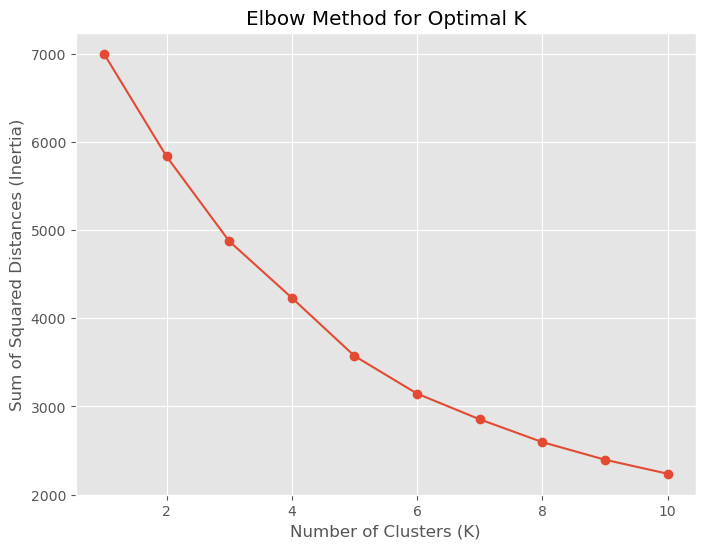

In [ ]:
# Run k-means clustering for a range of k values
inertia = []
for k in range(1, 11):  # You can adjust the range based on your specific needs
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Y_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
#choose k = 5
model = cluster.KMeans(n_clusters = 5, random_state = 10, n_init=10)

#fit the created k-means model to our data
model.fit(Y_scaled)

Y_scaled['cluster'] = model.labels_
Y_scaled

In [ ]:
#choosing PCA component
pca = PCA()
pca.fit(Y_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#culmulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Generating the cluster summary
cluster_summary = cluster_table(Y_scaled, 'cluster')

# Printing the summary table
print(cluster_summary)

In [ ]:
#pca = 2
pca = PCA(n_components = 2) # 2D graph for easy interpretation
Y_pca = pca.fit_transform(Y_scaled.drop('cluster', axis=1))

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pca[:, 0], y=Y_pca[:, 1], hue=Y_scaled['cluster'], palette='viridis', s=50)
plt.title('KMeans Clustering Results (2D PCA) - Pop')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# pca = 3
pca = PCA(n_components = 3)
Y_pca = pca.fit_transform(Y_scaled.drop('cluster', axis=1))
pca_df = pd.DataFrame(data = Y_pca, columns = ['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = Y_scaled['cluster'].reset_index(drop=True)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='cluster',
    #symbol='cluster',
    opacity=0.7,
    title='3D Scatter Plot with PCA'
)

# Show the plot
fig.show()

## Pop-film

In [ ]:
P = pop_film
scaler = StandardScaler().fit(P)
P_scaled = pd.DataFrame(scaler.fit_transform(P),columns=P.columns,index=P.index)

P_scaled

In [ ]:
# Run k-means clustering for a range of k values
inertia = []
for k in range(1, 11):  # You can adjust the range based on your specific needs
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(P_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
#choose k = 4
model = cluster.KMeans(n_clusters = 4, random_state = 10, n_init=10) 

#fit the created k-means model to our data
model.fit(P_scaled)

P_scaled['cluster'] = model.labels_
P_scaled

In [ ]:
#choosing PCA component
pca = PCA()
pca.fit(P_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#culmulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Generating the cluster summary
cluster_summary = cluster_table(P_scaled, 'cluster')

# Printing the summary table
print(cluster_summary)

In [ ]:
#pca = 2
pca = PCA(n_components = 2) # 2D graph for easy interpretation
P_pca = pca.fit_transform(P_scaled.drop('cluster', axis=1))

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=P_pca[:, 0], y=P_pca[:, 1], hue=P_scaled['cluster'], palette='viridis', s=50)
plt.title('KMeans Clustering Results (2D PCA) - Pop-film')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# pca = 3
pca = PCA(n_components = 3)
P_pca = pca.fit_transform(P_scaled.drop('cluster', axis=1))
pca_df = pd.DataFrame(data = P_pca, columns = ['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = P_scaled['cluster'].reset_index(drop=True)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='cluster',
    #symbol='cluster',
    opacity=0.7,
    title='3D Scatter Plot with PCA'
)

# Show the plot
fig.show()

## K-pop

In [ ]:
K = kpop 
scaler = StandardScaler().fit(K)
K_scaled = pd.DataFrame(scaler.fit_transform(K),columns=K.columns,index=K.index)

K_scaled

In [ ]:
# Run k-means clustering for a range of k values
inertia = []
for k in range(1, 15):  # You can adjust the range based on your specific needs
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(K_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
model = cluster.KMeans(n_clusters = 6, random_state = 10, n_init=10)

#fit the created k-means model to our data
model.fit(K_scaled)

K_scaled['cluster'] = model.labels_
K_scaled

In [ ]:
#choosing PCA component
pca = PCA()
pca.fit(K_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#culmulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Generating the cluster summary
cluster_summary = cluster_table(K_scaled, 'cluster')

# Printing the summary table
print(cluster_summary)

In [ ]:
#pca = 2
pca = PCA(n_components = 2) # 2D graph for easy interpretation
K_pca = pca.fit_transform(K_scaled.drop('cluster', axis=1))

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=K_pca[:, 0], y=K_pca[:, 1], hue=K_scaled['cluster'], palette='viridis', s=50)
plt.title('KMeans Clustering Results (2D PCA) - Kpop')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# pca = 3
pca = PCA(n_components = 3)
K_pca = pca.fit_transform(K_scaled.drop('cluster', axis=1))
pca_df = pd.DataFrame(data = K_pca, columns = ['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = K_scaled['cluster'].reset_index(drop=True)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='cluster',
    #symbol='cluster',
    opacity=0.7,
    title='3D Scatter Plot with PCA'
)

# Show the plot
fig.show()

## Hiphop

In [ ]:
H = hiphop 
scaler = StandardScaler().fit(H)
H_scaled = pd.DataFrame(scaler.fit_transform(H),columns=H.columns,index=H.index)

H_scaled

In [ ]:
# Run k-means clustering for a range of k values
inertia = []
for k in range(1, 11):  # You can adjust the range based on your specific needs
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(H_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
model = cluster.KMeans(n_clusters = 4, random_state = 10, n_init=10)

#fit the created k-means model to our data
model.fit(H_scaled)

H_scaled['cluster'] = model.labels_
H_scaled

In [ ]:
#choosing PCA component
pca = PCA()
pca.fit(H_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#culmulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Generating the cluster summary
cluster_summary = cluster_table(H_scaled, 'cluster')

# Printing the summary table
print(cluster_summary)

In [ ]:
#pca = 2
pca = PCA(n_components = 2) # 2D graph for easy interpretation
H_pca = pca.fit_transform(H_scaled.drop('cluster', axis=1))

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=H_pca[:, 0], y=H_pca[:, 1], hue=H_scaled['cluster'], palette='viridis', s=50)
plt.title('KMeans Clustering Results (2D PCA) - Hiphop')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# pca = 3
pca = PCA(n_components = 3)
H_pca = pca.fit_transform(H_scaled.drop('cluster', axis=1))
pca_df = pd.DataFrame(data = H_pca, columns = ['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = H_scaled['cluster'].reset_index(drop=True)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='cluster',
    #symbol='cluster',
    opacity=0.7,
    title='3D Scatter Plot with PCA'
)

# Show the plot
fig.show()

## Chill

In [ ]:
C = chill 
scaler = StandardScaler().fit(C)
C_scaled = pd.DataFrame(scaler.fit_transform(C),columns=C.columns,index=C.index)

C_scaled

In [ ]:
# Run k-means clustering for a range of k values
inertia = []
for k in range(1, 11):  # You can adjust the range based on your specific needs
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(C_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()

In [ ]:
model = cluster.KMeans(n_clusters = 5, random_state = 10, n_init=10)

#fit the created k-means model to our data
model.fit(C_scaled)

C_scaled['cluster'] = model.labels_
C_scaled

In [ ]:
#choosing PCA component
pca = PCA()
pca.fit(C_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#culmulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Generating the cluster summary
cluster_summary = cluster_table(C_scaled, 'cluster')

# Printing the summary table
print(cluster_summary)

In [ ]:
#pca = 2
pca = PCA(n_components = 2) # 2D graph for easy interpretation
C_pca = pca.fit_transform(C_scaled.drop('cluster', axis=1))

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=C_pca[:, 0], y=C_pca[:, 1], hue=C_scaled['cluster'], palette='viridis', s=50)
plt.title('KMeans Clustering Results (2D PCA) - Chill')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# pca = 3
pca = PCA(n_components = 3)
C_pca = pca.fit_transform(C_scaled.drop('cluster', axis=1))
pca_df = pd.DataFrame(data = C_pca, columns = ['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = C_scaled['cluster'].reset_index(drop=True)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3',
    color='cluster',
    #symbol='cluster',
    opacity=0.7,
    title='3D Scatter Plot with PCA'
)

# Show the plot
fig.show()